# Stroke prediction
Luis Roberto Chávez Mancilla

José Emiliano Figueroa Hernández

Samantha Abigail Quintero Valadez

Axel Escoto García

## Description
Strokes are the second most common cause of dead, based on WHO data. 

This data set provides multiple atributes and a total of 5110 observations, all of this data can be used to predict if a patient is likely to have a stroke.

### Questions
¿La edad puede ser un factor importante para este tipo de afección?
¿Se puede relacionar el fumar con este tipo de problema?
¿Cuales son los datos que más se ligan a la aparición de la enfermedad?
¿Podríamos predecir si alguien sería propenso a este tipo de afección?
¿Es más probable que una mujer padezca un derrame a que lo padezca un hombre?


### Atributes

In [21]:
import pandas as pd
import seaborn as sns
from lifelines import ExponentialFitter
import matplotlib.pyplot as plt

# Para obtener múltiples salidas de una celda
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


In [22]:
# Read data with encodig utf-8 on to var data
data = pd.read_csv("stroke.csv", encoding="utf-8")

In [23]:
# Create data backup
data_backup= data.copy()

In [24]:
# Get columns
columns=data.columns
columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

# Data types

In [25]:
nominal=["gender","hypertension", "heart_disease","work_type","Residence_type", "smoking_status", "stroke"]
ordinal=[]
interval=[]
ratio=["age", "avg_glucose_level","bmi"]

# Convert all nominal to categorical

In [26]:
for i in nominal:
    data[i] = data[i].astype("category")

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   id                 5110 non-null   int64   
 1   gender             5110 non-null   category
 2   age                5110 non-null   float64 
 3   hypertension       5110 non-null   category
 4   heart_disease      5110 non-null   category
 5   ever_married       5110 non-null   object  
 6   work_type          5110 non-null   category
 7   Residence_type     5110 non-null   category
 8   avg_glucose_level  5110 non-null   float64 
 9   bmi                4909 non-null   float64 
 10  smoking_status     5110 non-null   category
 11  stroke             5110 non-null   category
dtypes: category(7), float64(3), int64(1), object(1)
memory usage: 235.7+ KB


# LOC

In [28]:
#Podemos crear nuevos data frames a partir de ciertos datos o categorias

data_stroke = data.loc[data.stroke == 1]
data_stroke

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
244,17739,Male,57.0,0,0,Yes,Private,Rural,84.96,36.7,Unknown,1
245,49669,Female,14.0,0,0,No,children,Rural,57.93,30.9,Unknown,1
246,27153,Female,75.0,0,0,Yes,Self-employed,Rural,78.80,29.3,formerly smoked,1
247,34060,Male,71.0,1,0,Yes,Self-employed,Rural,87.80,NaN,Unknown,1


# Unique data on categorical

In [29]:
for i in nominal:
    print("\nVar: ",i)
    print(data[i].unique())


Var:  gender
['Male', 'Female', 'Other']
Categories (3, object): ['Female', 'Male', 'Other']

Var:  hypertension
[0, 1]
Categories (2, int64): [0, 1]

Var:  heart_disease
[1, 0]
Categories (2, int64): [0, 1]

Var:  work_type
['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked']
Categories (5, object): ['Govt_job', 'Never_worked', 'Private', 'Self-employed', 'children']

Var:  Residence_type
['Urban', 'Rural']
Categories (2, object): ['Rural', 'Urban']

Var:  smoking_status
['formerly smoked', 'never smoked', 'smokes', 'Unknown']
Categories (4, object): ['Unknown', 'formerly smoked', 'never smoked', 'smokes']

Var:  stroke
[1, 0]
Categories (2, int64): [0, 1]


### Findings
Tenemos 4 variables dicotómicas: hypertension, heart_disease, Residence_type, y stroke. El resto varian entre 3 a 5 posibles valores lo cual los hace tener una mayor cardinalida sobre el resto, sindo la más alta el tipo de trabajo de la persona observada o work_type.

We have 4 dichtomic variables: hypertension, heart_disease, Residence_type and stroke. The rest vary from 3 to 5 posible values, which gives the categories a higher cardinal value than the rest, but still they will not be considered as variables with high cardinality.
 


# Exploring quantity of samples by category

In [30]:
for i in nominal:
    print(i)
    data[i].value_counts()
    print()

gender


gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64


hypertension


hypertension
0    4612
1     498
Name: count, dtype: int64


heart_disease


heart_disease
0    4834
1     276
Name: count, dtype: int64


work_type


work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64


Residence_type


Residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64


smoking_status


smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64


stroke


stroke
0    4861
1     249
Name: count, dtype: int64

# Findings
- We only have one observations with "other" gender.
- About 95% of the observations didnt suffer a stroke, and the rest did suffer a stroke.



# Cleaning
Using filter and assigning to transform data to more simple data that means the same in a numerical way

# Categorical data (Pandas)
In case od NaN data it will mark the category as -1

In [31]:
# Creamos un dato categorico de pandas
c = pd.Categorical(data.gender)
# Podemos ver las categorias de este
c.categories


Index(['Female', 'Male', 'Other'], dtype='object')

In [32]:
#Podemos ver los codigos de categorias de cada dato u observacion
c.codes

array([1, 0, 1, ..., 0, 1, 0], dtype=int8)

# Percentages

In [33]:
for i in nominal:
    print("\nVar: ", i)
    print(data[i].value_counts(normalize=True)*100)


Var:  gender
gender
Female    58.590998
Male      41.389432
Other      0.019569
Name: proportion, dtype: float64

Var:  hypertension
hypertension
0    90.254403
1     9.745597
Name: proportion, dtype: float64

Var:  heart_disease
heart_disease
0    94.598826
1     5.401174
Name: proportion, dtype: float64

Var:  work_type
work_type
Private          57.240705
Self-employed    16.027397
children         13.444227
Govt_job         12.857143
Never_worked      0.430528
Name: proportion, dtype: float64

Var:  Residence_type
Residence_type
Urban    50.802348
Rural    49.197652
Name: proportion, dtype: float64

Var:  smoking_status
smoking_status
never smoked       37.025440
Unknown            30.215264
formerly smoked    17.318982
smokes             15.440313
Name: proportion, dtype: float64

Var:  stroke
stroke
0    95.127202
1     4.872798
Name: proportion, dtype: float64


# Univaried plots for categorical
- Donut and pie with less of 6 categories
- Bars for every categorical

### Gender

In [34]:
pc_gender = data.gender.value_counts(normalize=True)*100
pc_gender

gender
Female    58.590998
Male      41.389432
Other      0.019569
Name: proportion, dtype: float64

In [35]:
freq_gender=data.gender.value_counts()
freq_gender, freq_gender.values

(gender
 Female    2994
 Male      2115
 Other        1
 Name: count, dtype: int64,
 array([2994, 2115,    1]))

([<matplotlib.patches.Wedge at 0x16afa2350>,
 [Text(-0.29329251556156405, 1.0601789944700706, 'Female'),
  Text(0.2926407116602305, -1.0603590966644243, 'Male'),
  Text(1.0999997921700193, -0.0006761848226571827, 'Other')],
 [Text(-0.15997773576085308, 0.5782794515291293, '58.59%'),
  Text(0.1596222063601257, -0.5783776890896859, '41.39%'),
  Text(0.5999998866381923, -0.000368828085085736, '0.02%')])

<BarContainer object of 3 artists>

<Axes: xlabel='gender', ylabel='count'>

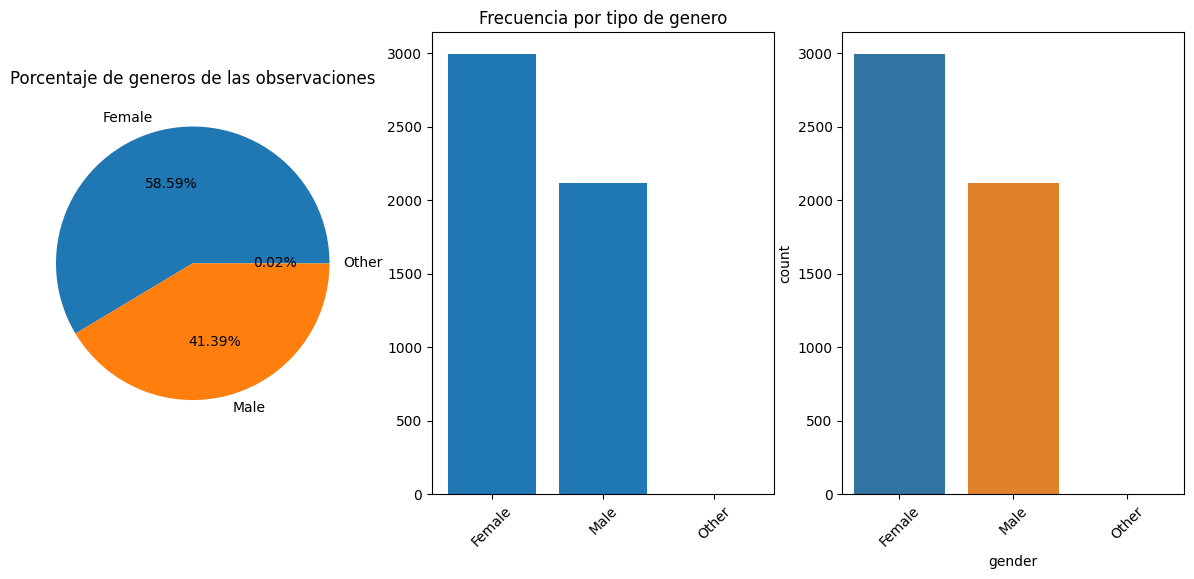

In [36]:
#plt.Figure(figsize=(4,3))
#plt.title("Porcentaje de generos de las observaciones")
#plt.pie(pc_gender, labels = pc_gender.index, autopct="%.1f%%",pctdistance=0.75)
#plt.show()

fig, ax = plt.subplots(1,3, figsize=(15,6))
#Pie
ax[0].pie(pc_gender, 
        labels=pc_gender.index, 
        autopct="%.2f%%")
ax[0].title.set_text('Porcentaje de generos de las observaciones')
#Bar - Countplot
ax[1].bar(freq_gender.index,
        height=freq_gender.values) 
ax[1].title.set_text('Frecuencia por tipo de genero')
sns.countplot(data=data, x ="gender",ax=ax[2])
ax[1].tick_params(axis='x', rotation=45)
ax[2].tick_params(axis='x', rotation=45)

plt.show()


([<matplotlib.patches.Wedge at 0x16af07e10>,
 [Text(-0.29329251556156405, 1.0601789944700706, 'Female'),
  Text(0.2926407116602305, -1.0603590966644243, 'Male'),
  Text(1.0999997921700193, -0.0006761848226571827, 'Other')],
 [Text(-0.19997216970106635, 0.7228493144114116, '58.59%'),
  Text(0.19952775795015715, -0.7229721113621075, '41.39%'),
  Text(0.7499998582977404, -0.00046103510635717, '0.02%')])

Text(0.5, 1.0, 'Porcentaje de generos en las observaciones (PIE)')

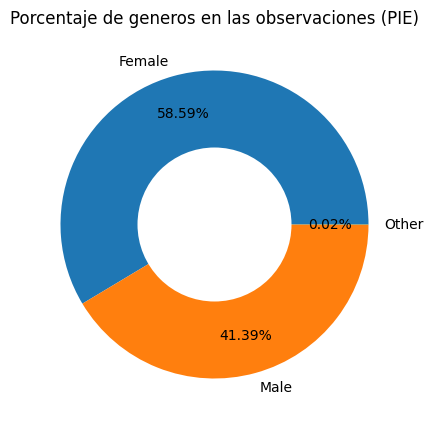

In [37]:
plt.pie(pc_gender, labels=pc_gender.index,
        autopct='%1.2f%%', pctdistance=0.75,
        )
centre_circle = plt.Circle((0,0), 0.5, fc="white")
fig = plt.gcf()
fig.set_figwidth(5)
fig.set_figheight(5)
fig.gca().add_artist(centre_circle)
plt.title("Porcentaje de generos en las observaciones (PIE)")

plt.show()

## Findings
- We have an 8% unbalance between female and male observations
- "Other" category only has one observation

### BMI

<Axes: >

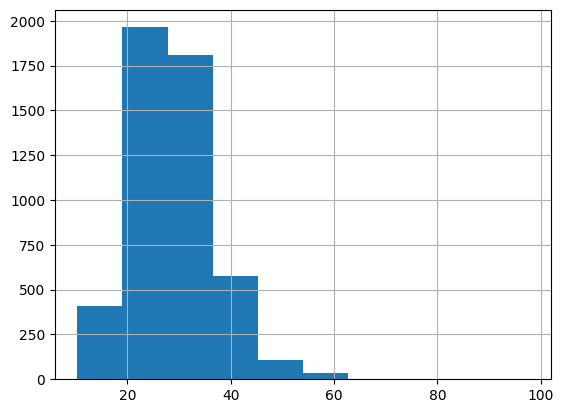

In [42]:
#Histogram
#fig, ax = plt.subplots(figsize=(5,3))
data.bmi.hist(labels)

- Use histograms for continuous data
- Use bars for discrete data

# Logaritmic for 

# Conversion a dummy
Esto hace que todo lo categorico se transforme a dictómico con valoes de falso o verdadero.
Cuado tenemos nominales de baja cardinalidad usamos los dummies.

las varaibles categoricas nominales de baja cardinalidad se pueden convertir a get.dummies y puedo crear cuantas columnas como tategorias o k-1.

In [39]:
data_dumm_todas = pd.get_dummies(data)
data_dumm_todas

,id,age,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,hypertension_0,hypertension_1,heart_disease_0,...,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke_0,stroke_1
0,9046,67.0,228.69,36.6,False,True,False,True,False,False,...,False,False,False,True,False,True,False,False,False,True
1,51676,61.0,202.21,NaN,True,False,False,True,False,True,...,True,False,True,False,False,False,True,False,False,True
2,31112,80.0,105.92,32.5,False,True,False,True,False,False,...,False,False,True,False,False,False,True,False,False,True
3,60182,49.0,171.23,34.4,True,False,False,True,False,True,...,False,False,False,True,False,False,False,True,False,True
4,1665,79.0,174.12,24.0,True,False,False,False,True,True,...,True,False,True,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,80.0,83.75,NaN,True,False,False,False,True,True,...,False,False,False,True,False,False,True,False,True,False
5106,44873,81.0,125.20,40.0,True,False,False,True,False,True,...,True,False,False,True,False,False,True,False,True,False
5107,19723,35.0,82.99,30.6,True,False,False,True,False,True,...,True,False,True,False,False,False,True,False,True,False
5108,37544,51.0,166.29,25.6,False,True,False,True,False,True,...,False,False,True,False,False,True,False,False,True,False


# Outliers
Ocurre algo que es el sobre ajuste del modelo (overfitting)

En univariado, para las de razon tenemos que hacer boxplot y detectar outliers, luego proponer que haremos con esos outliers.

Eliminarlos directamente debe ser la última opción y tiene que estar muy muy justificado.